# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Описание данных**

Таблица **mkrf_movies** содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

- **title** — название фильма;
- **puNumber** — номер прокатного удостоверения;
- **show_start_date** — дата премьеры фильма;
- **type** — тип фильма;
- **film_studio** — студия-производитель;
- **production_country** — страна-производитель;
- **director** — режиссёр;
- **producer** — продюсер;
- **age_restriction** — возрастная категория;
- **refundable_support** — объём возвратных средств государственной поддержки;
- **nonrefundable_support** — объём невозвратных средств государственной поддержки;
- **financing_source** — источник государственного финансирования;
- **budget** — общий бюджет фильма;
- **ratings** — рейтинг фильма на КиноПоиске;
- **genres** — жанр фильма.

Cтолбец **budget** уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица **mkrf_shows** содержит сведения о показах фильмов в российских кинотеатрах.
- **puNumber** — номер прокатного удостоверения;
- **box_office** — сборы в рублях.

**Цель работы** -  изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. 

**План работы**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Исследование фильмов, получившие государственную поддержку
5. Общий вывод.

## Загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Открытие файла с данными и объединение их в один датафрейм. 

In [2]:
movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
movies.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"


In [3]:
# Информация о данных
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
# Информация о данных
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
# Изменение типа данных
shows['puNumber'] = shows['puNumber'].astype(str)

In [7]:
# Объединение таблиц
data = movies.merge(shows, on='puNumber', how='left') 

### Предобработка данных

#### Анализ типа данных

In [8]:
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

- столбец **'show_start_date'** преобразую в формат datetime

In [9]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')

- столбец **'ratings'** преобразую в float, а выбивающиеся строки с % переведу в десятичный формат

In [10]:
data['ratings'] = data['ratings'].fillna(0)
data['ratings'] = data['ratings'].astype(str)
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype(float)

In [11]:
for t in data['ratings']:
    data.loc[(data['ratings'] > 10), 'ratings'] = \
    data.loc[(data['ratings'] > 10), 'ratings']/10

In [12]:
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Пропуски в датафрейме

In [13]:
data.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
box_office               4328
genres                    976
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
puNumber                    0
show_start_date             0
type                        0
age_restriction             0
ratings                     0
dtype: int64

В таблице есть пропуски в столбцах: film_studio, production_country, director, refundable_support, nonrefundable_support, budget, financing_source, genres и box_office 

- столбец **'production_country'**

В столбце 'production_country' всего 2 пропуска, заполню данными из интернета

In [14]:
data[data['production_country'].isna()]

data.loc[3186, 'production_country'] = 'Россия'
data.loc[4441, 'production_country'] = 'Россия'

- столбцы **'refundable_support', 'nonrefundable_support', 'budget', 'financing_source'** 

In [15]:
print('Информация в строках заполнена по всем столбцам:',len(data.query('refundable_support>=0 & nonrefundable_support>=0 & budget>=0')))
print('Информация в строках заполнена по одному из столбцу:',len(data.query('refundable_support>=0 or nonrefundable_support>=0 or budget>=0')))

Информация в строках заполнена по всем столбцам: 332
Информация в строках заполнена по одному из столбцу: 332


In [16]:
# Создаем копию данных, фильтруя только те записи, где есть господдержка
support = data[~data['refundable_support'].isna()].copy()
support['production_country'] = support['production_country'].dropna().apply(lambda x: x.split(',')[0])

print('Количество фильмов с господдержкой:',len(support))
print('Количество иностранных фильмов с господдержкой:',len(support.query('production_country != "Россия"')))

# Создаем копию данных, фильтруя только те записи, где нет господдержки
not_support = data[data['refundable_support'].isna()].copy()
not_support['production_country'] = not_support['production_country'].dropna().apply(lambda x: x.split(',')[0])

print('Количество фильмов из России без господдержки:',len((not_support.query('production_country == "Россия"'))))
print('Доля фильмов с господдержкой среди российских фильмов', len(support)/(len(support)+len((not_support.query('production_country == "Россия"')))))

Количество фильмов с господдержкой: 332
Количество иностранных фильмов с господдержкой: 4
Количество фильмов из России без господдержки: 1533
Доля фильмов с господдержкой среди российских фильмов 0.1780160857908847


- Господдержка оказывалась только для фильмов, для которых Россия является основной страной-производителем. 
- Только для 17% российских фильмов из данных оказывалась господдержка
- Для всех фильмов с господдержкой заполнены столбцы 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' (т.е. содержимое не NaN)

- столбцы **'director', 'producer' и 'film_studio', 'genres'**

In [17]:
# Находим дубликаты по столбцу 'film_studio' и сортируем по этому столбцу
film_studio = data.loc[data.duplicated(subset=['film_studio'], keep=False)].sort_values(by='film_studio')

# Убираем дубликаты
film_studio = film_studio.loc[~data.duplicated(subset=['director', 'producer'], keep=False)].sort_values(by='film_studio')

print(len(film_studio))
film_studio.head(5)

1047


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1986,Ёлки 1914,111023014,2014-12-10 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,"Т.Бекмамбетов, О.Харина, Ю.Быков, Д.Киселев, А...","Т.Бекмамбетов, С.Агеев",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.7,"семейный,комедия,драма",425970499.0
1987,Елки Лохматые,111023114,2014-12-10 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26000000.0,30000000.0,80000000.0,Фонд кино,5.0,"семейный,комедия",121225633.8
4529,Ёлки,111010710,2010-12-08 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,"Т.Бекмамбетов, Я.Чеважевский, А.Войтинский, Д....","С.Муазен, А.Ремизова",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.9,комедия,125.0
6209,Похищенные сокровища Европы,126001518,2018-09-06 12:00:00,Прочие,"3D Продуциони, Нексо Диджитал","Италия, Франция, Германия",Клаудио Поли,Вероника Ботанелли,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,0.0,NaN,NaN
6866,Гоген: В поисках утраченного рая,126001019,2019-04-16 12:00:00,Прочие,"3D Продуциони, Нексо Диджитал",Италия,Клаудио Поли,"Франко Ди Сарро, Диди Ньокки",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,0.0,NaN,380009.0


Я предположила, что такие данные как: director, producer и film_studio могут быть взаимосвязанны. 
Я предварительно рассмотрела пропуски в столбце director (так как их всего 9) - и профильтровала каждую строку с пропуском по совпадению с идентичными значениями film_studio или producer в других строках таблицы. 
По итогу, в одной студии фильма могут быть разные режиссеры и продюсеры (и жанры тоже разные)

Затем еще раз проверила поставив фильтр на одинаковые значения в film_studio, но разные значения в 'director','producer'' и удостоверилась в отсутствие взаимосвязи

- столбец **'box_office'**

Столбец 'box_office' скорее всего заполнен лишь теми фильмами, для которых уже посчитаны сборы 

#### Дубликаты в датафрейме

In [18]:
data.duplicated().sum() # подсчёт количества дубликатов

0

In [19]:
data.nunique() # количество всех уникальных значений в dataframe

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    85
genres                    742
box_office               2938
dtype: int64

- Столбец **'title'**

In [20]:
# Находим дубликаты по столбцу 'title' и сортируем по этому столбцу
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title').head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN


In [21]:
# Находим дубликаты по столбцу 'title' и сортируем по этому столбцу
title = data.loc[data.duplicated(subset=['title'], keep=False)].sort_values(by='title')
# Убираем дубликаты, оставляя только уникальные комбинации 'genres' и 'director'
title = title.loc[~data.duplicated(subset=['genres', 'director'], keep=False)].sort_values(by='title')
title.head(4)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6674,Большая игра,111001819,2019-02-28 12:00:00,Художественный,"ООО ""ГГФ"" по заказу АО ""Сеть телевизионных ста...",Россия,Б.Батуллин,А.Марченко,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,криминал,биография",NaN
5671,Большая игра,121027917,2018-01-11 12:00:00,Художественный,"Интертейнмент Уан, Паскаль Пикчерз, Марк Гордо...",США,Аарон Соркин,"Марк Гордон, Эми Паскаль",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.6,"драма,криминал,биография",77806917.35
3394,В тихом омуте,121018516,2016-06-21 12:00:00,Художественный,"Зэ Бэ Продуцион, Твенти Твенти Вижн Филмпродуц...",Германия - Франция,Брюно Дюмон,"Жан Бреа, Рашид Бушареб, Мюриэль Мерлин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",2883624.01
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


Повторы в столбце title существуют по 2 причинам:
- разные запуски одного и того же фильма
- разные фильмы с одним и тем же названием

- Столбец **'puNumber'**

Номер прокатного удостоверения - это документ, дающий право на прокат (демонстрацию) фильма на территории Российской Федерации, а также на его тиражирование и распространение, в том числе по кабельным или эфирным каналам.

Вероятно, идентичность номера для трех разных фильмов - опечатка. Так как данный столбец не имеет практической пользы для анализа - оставлю как есть

In [22]:
data.loc[data['puNumber'].duplicated(keep=False)].sort_values(by='puNumber').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


- Столбец **'show_start_date'**

Очевидно, что разные фильмы могут выходить на экран в один и тот же день.

In [23]:
# Находим дубликаты по столбцу 'show_start_date' и сортируем по этому столбцу
data.loc[data['show_start_date'].duplicated(keep=False)].sort_values(by='show_start_date').head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4332,Вечный зов.,213000210,2010-01-13 12:00:00,Художественный,"ОАО ""Леннаучфильм""",Россия,"В.Ефремов, И.Ефремова, В.Лопач",В.Бажин,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.3,драма,NaN
4466,Последний король Шотландии,221002410,2010-01-13 12:00:00,Художественный,"Дэ Эн А Филмз, Фокс Серчлайт Пикчерз, Филм Фо,...",Великобритания - США,Кевин МакДональд,"Лиза Брайер, Андреа Колдервуд, Кристин Рупперт...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,драма,биография",NaN


- Столбец **'type'** 

In [24]:
# Получаем уникальные значения из столбца
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Есть несколько значений, у которых появился пробел в начале строки, необходимо избавиться от неявных дубликатов

In [25]:
# Удаляем пробелы в начале и в конце строк в столбце 'type'
data['type'] = data['type'].str.strip() 
data['type'].unique() #проверка

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

- Столбец **'film_studio'**

In [26]:
data['film_studio'].unique()[:15]

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       'Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл',
       'Пульсар Продюксьон, ТФ1 Фильм ',
       'Киностудия "Мосфильм", Телевидение ВНР',
       'Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гипнотик, Калима Продакшнз, Лудлум Интертейнмент',
       'Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо Продакшнз, Альберт С.Рудди Продакшнз',
       'Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Скайон Филмз Лимитед, ЮК Филм Каунсил',
       'Кэтлей, Отель Продакшнс, Мунстоун Интертейнмент, Рэд Маллет Продакшнс',
       'Инишиэл Интертейнмент Групп, Мирамакс Филмз, Персистент Интертейнмент, Революшн Студиос, Зе Лэдд Компани',
       'Фильмове Студио Баррандов',
       'Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатурн Филмз

Есть несколько значений, у которых есть пробелы в начале и конце строки, а также лишние пробелы при перечисление 

In [27]:
# Выводим количество уникальных значений в столбце 'film_studio'
print('количество уникальных значений в столбце film_studio:', len(data['film_studio'].unique()))

# Удаляем пробелы в начале и в конце строк в столбце 'film_studio'
data['film_studio'] = data['film_studio'].str.strip() 

# Выводим количество уникальных значений после очистки
print('количество уникальных значений после удаления пробелов в начале и в конце строк:', len(data['film_studio'].unique()))

# Список символов, которые будут заменены на запятую
list = ['-',' -','- ',' - ',', ',' ,']

# Заменяем указанные символы в столбце 'film_studio' на запятую
for i in list:
    data['film_studio'] =  data['film_studio'].str.replace(i, ',')

# Выводим количество уникальных значений после замены
print('количество уникальных значений после замены значений:', len(data['film_studio'].unique()))

количество уникальных значений в столбце film_studio: 5491
количество уникальных значений после удаления пробелов в начале и в конце строк: 5463
количество уникальных значений после замены значений: 5460


- Столбец **'production_country'**

In [28]:
data['production_country'].unique()[:30]

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия'], dtype=object)

In [29]:
# Удаляем пробелы в начале и в конце строк в столбце 'production_country'
data['production_country'] = data['production_country'].str.strip()

# Список символов, которые будут заменены на запятую
list = ['-',' -','- ',' - ',', ',' ,']
# Заменяем указанные символы в столбце 'production_country' на запятую
for i in list:
    data['production_country'] =  data['production_country'].str.replace(i, ',')

# Исправляем конкретные ошибки в названиях стран
data['production_country'] =  data['production_country'].str.replace('Бразилия,Германия,Порртугалия,Франция', 'Бразилия,Германия,Португалия,Франция')
data['production_country'] =  data['production_country'].str.replace('Бразилия,К;анада', 'Бразилия,Канада')

# Вывод уникальных значений в отсортированном виде
#sorted(data['production_country'].unique()) 

В этом столбце большое количество неявных дубликатов, от некоторых из них я избавилась. Дубликаты появились скорее всего из-за ручного ввода данных в данном столбце

- Столбец **'director'**

In [30]:
data['director'].unique()[:30]

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов',
       'В.Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В.Титов',
       'Пол Грингросс', 'М.Туманишвили', 'Клинт Иствуд',
       'Фернанду Мейрелльеш', 'Майк Фиггис', 'А.Салтыков', 'Г.Данелия',
       'А.Смирнов', 'Ю.Чулюкин', 'В.Краснопольский, В.Усков',
       'М.Чиаурели', 'Лассе Халлстрем', 'Л.Гайдай', 'В.Чеботарев',
       'В.Азаров', 'Боривой Земан', 'Эндрю Никкол', 'Г.Мыльников',
       'Джонатан Кинг', 'И.Бабич', 'Даниэль Робишо', 'Грегори Хоблит'],
      dtype=object)

In [31]:
# Выводим количество уникальных значений в столбце 'director'
print('Количество уникальных режиссеров до очистки:', len(data['director'].unique()))

# Удаляем пробелы в начале и в конце строк в столбце 'director'
data['director'] = data['director'].str.strip() 

# Выводим количество уникальных значений после очистки
print('Количество уникальных режиссеров после очистки:', len(data['director'].unique()))

# Список символов, которые будут заменены на запятую
list = ['-',' -','- ',' - ',', ',' ,']

# Заменяем указанные символы в столбце 'director' на запятую
for i in list:
    data['director'] = data['director'].str.replace(i, ',')

# Выводим количество уникальных значений после замены
print('Количество уникальных режиссеров после замены символов:', len(data['director'].unique()))

Количество уникальных режиссеров до очистки: 4812
Количество уникальных режиссеров после очистки: 4802
Количество уникальных режиссеров после замены символов: 4802


Есть несколько значений, у которых есть пробелы в начале и конце строки

- Столбец **'producer'**


In [32]:
# Выводим количество уникальных значений в столбце 'producer'
print('Количество уникальных продюсеров до очистки:', len(data['producer'].unique()))

# Удаляем пробелы в начале и в конце строк в столбце 'producer'
data['producer'] = data['producer'].str.strip()

# Выводим количество уникальных значений после очистки
print('Количество уникальных продюсеров после очистки:', len(data['producer'].unique()))

# Список символов, которые будут заменены на запятую
list = ['-',' -','- ',' - ',', ',' ,']

# Заменяем указанные символы в столбце 'producer' на запятую
for i in list:
    data['producer'] = data['producer'].str.replace(i, ',')

# Выводим количество уникальных значений после замены
print('Количество уникальных продюсеров после замены символов:', len(data['producer'].unique()))

Количество уникальных продюсеров до очистки: 5350
Количество уникальных продюсеров после очистки: 5335
Количество уникальных продюсеров после замены символов: 5335


Есть несколько значений, у которых есть пробелы в начале и конце строки

- Столбец **'age_restriction'**

In [33]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Повторы отсутствуют

- Столбец **'genres'**

In [34]:
# повторяю логику очистки от дубликатов
print(len(data['genres'].unique()))
data['genres'] = data['genres'].str.strip() 
print(len(data['genres'].unique()))
list = ['-',' -','- ',' - ',', ',' ,']
for i in list:
    data['genres'] =  data['genres'].str.replace(i, ',')
print(len(data['genres'].unique()))

743
743
743


Повторы отсутствуют

#### Анализ категориальных значений

Категориальные данные это столбцы:  title, show_start_date, type, film_studio, production_country, age_restriction, genres, director, producer.

- В столбце title есть две категории повторов: разные запуски одного и того же фильма и разные фильмы с одним и тем же названием
- В столбце 'puNumber' есть повторы-опечатки: идентичность номера для трех разных фильмов
- Для столбцов title, type, 'film_studio', 'production_country', 'director', 'producer' - основная ошибка - это пробелы в начале или в конце строки, а также лишние пробелы при перечисление. В стобце production_country я выявила очевидные опечатки при просмотре уникальных значений (например, "К;анада"), также избавилась от разделителей-дефисов, заменяющих в некоторых строках запятые.
- Есть пропуски в столбцах: film_studio, production_country, director, genres, но взаимосвязь для заполнения пропусков отсутствует. 

#### Анализ количественных значений

- Есть строки, в которых обозначенно оказание господдержки, но общий бюджет равен нулю, заменю их медианными значениями доли общей суммы поддержки от общего бюджета фильма

In [35]:
budget0 = data.query('(refundable_support != 0 or refundable_support !=0) and budget == 0')
budget0.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"",ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"",ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"",ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"",ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук,Т.Вайнштейн,Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3675,Чудо-юдо,114001817,2017-06-27 12:00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,20000000.0,20000000.0,0.0,Фонд кино,5.2,"мультфильм,фэнтези,семейный",5.510801e+07


In [36]:
# Фильтруем данные, оставляя только те записи, где есть поддержка (возмездная или безвозмездная) и бюджет больше 0
budget_norm = data.query('(refundable_support != 0 or nonrefundable_support != 0) and budget > 0').copy()

# Создаем новый столбец 'support', который является суммой возмездной и безвозмездной поддержки
budget_norm['support'] = budget_norm['refundable_support'] + budget_norm['nonrefundable_support']

In [37]:
# Вычисляем долю поддержки на бюджет и сохраняем в новый столбец 'support_per'
budget_norm['support_per'] = budget_norm['support'] / budget_norm['budget']

# Находим медианное значение доли поддержки
support_per = budget_norm['support_per'].median()

# Обновляем значения бюджета в исходных данных, используя рассчитанную долю поддержки
data.loc[budget_norm.index, 'budget'] = (data.loc[budget_norm.index, 'refundable_support'] + data.loc[budget_norm.index, 'nonrefundable_support']) / support_per

**Количественные данные это столбцы:**  trefundable_support, nonrefundable_support, budget, financing_source, ratings, box_office.

- Господдержка оказывалась только для фильмов, для которых Россия является основной страной-производителем. 
- Только для 17% российских фильмов из данных оказывалась господдержка
- Для всех фильмов с господдержкой заполнены столбцы 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' (т.е. содержимое не NaN), но при это есть строки, в которых обозначенно оказание господдержки, но общий бюджет равен нулю, заменила их медианными значениями доли общей суммы поддержки от общего бюджета фильма.
- В столбце 'box_office' также есть пропуски, скорее всего столбец заполнен лишь теми фильмами, для которых уже посчитаны сборы.

#### Добавление новых столбцов

- Создание столбца с информацией о годе проката

In [38]:
data['year'] = data['show_start_date'].dt.year
data[['year', 'show_start_date']].head() #проверка

,year,show_start_date
0,2015,2015-11-27 12:00:00
1,2016,2016-09-13 12:00:00
2,2016,2016-10-10 12:00:00
3,2016,2016-06-10 12:00:00
4,2015,2015-07-29 12:00:00


- Создание столбцов с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [39]:
def full_name(data, columns):
    try:
        for column in columns:
            data[f'base_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
        return data
    except:
        pass

In [40]:
data = full_name(data, ['director', 'genres'])

In [41]:
data[['genres', 'base_genres', 'director','base_director']].head() #проверка

,genres,base_genres,director,base_director
0,"боевик,драма,мелодрама",боевик,Кевин Костнер,Кевин Костнер
1,"драма,военный",драма,Е.Матвеев,Е.Матвеев
2,"фантастика,боевик,триллер",фантастика,Тимур Бекмамбетов,Тимур Бекмамбетов
3,"фантастика,боевик,триллер",фантастика,Тимур Бекмамбетов,Тимур Бекмамбетов
4,"фантастика,боевик,триллер",фантастика,Тимур Бекмамбетов,Тимур Бекмамбетов


- Рассчет доли от общего бюджета фильма составляемый государственной поддержкой.

In [42]:
print('Доля от общего бюджета фильма составляемый государственной поддержкой:', support_per.round(2)) 

Доля от общего бюджета фильма составляемый государственной поддержкой: 0.59


#### Вывод

1. **Категориальные данные это столбцы:**  title, show_start_date, type, film_studio, production_country, age_restriction, genres, director, producer.

- В столбце title есть две категории повторов: разные запуски одного и того же фильма и разные фильмы с одним и тем же названием
- В столбце 'puNumber' есть повторы-опечатки: идентичность номера для трех разных фильмов
- Для столбцов title, type, 'film_studio', 'production_country', 'director', 'producer' - jсновная ошибка - это пробелы в начале или в конце строки, а также лишние пробелы при перечисление. В стобце production_country я выявила очевидные опечатки при просмотре уникальных значений (например, "К;анада"), также избавилась от разделителей-дефисов, заменяющих в некоторых строках запятые.
- Есть пропуски в столбцах: film_studio, production_country, director, genres, но взаимосвязь для заполнения пропусков отсутствует. 

2. **Количественные данные это столбцы:**  trefundable_support, nonrefundable_support, budget, financing_source, ratings, box_office.

- Господдержка оказывалась только для фильмов, для которых Россия является основной страной-производителем. 
- Только для **17%** российских фильмов из данных оказывалась господдержка
- Для всех фильмов с господдержкой заполнены столбцы 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' (т.е. содержимое не NaN), но при это есть строки, в которых обозначенно оказание господдержки, но общий бюджет равен нулю, заменила их медианными значениями доли общей суммы поддержки от общего бюджета фильма.
- В столбце 'box_office' также есть пропуски, скорее всего столбец заполнен лишь теми фильмами, для которых уже посчитаны сборы.
- Доля от общего бюджета фильма составляемый государственной поддержкой: **0,59**


3. - Добавлены столбцы с информацией о годе проката. Также столбцы с именем и фамилией главного режиссёра и с основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно.

### Исследовательский анализ данных


- Исследование количества фильмов выходящих в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Посчитана доля фильмов с указанной информацией о прокате в кинотеатрах.

In [43]:
print('Доля фильмов с указанной информацией о прокате в кинотеатрах:', data.box_office.notna().mean().round(2))

Доля фильмов с указанной информацией о прокате в кинотеатрах: 0.42


In [44]:
# Считаем количество фильмов, которые имели кассовые сборы, по годам
release = data.query('box_office > 0')['year'].value_counts().sort_index()

# Считаем количество фильмов, которые не имели кассовых сборов, по годам
not_release = data.loc[~(data['box_office'] > 0)]['year'].value_counts().sort_index()

# Объединяем данные о выпущенных и невыпущенных фильмах в один DataFrame
box = pd.concat([release, not_release], axis=1)
box.columns = ['release', 'not_release']

# Пересчитываем количество фильмов, которые не имели кассовых сборов
not_release = data.loc[~(data['box_office'] > 0)]['year'].value_counts().sort_index()

# Вычисляем долю выпущенных фильмов в процентах
box['share_release'] = box['release'] / (box['not_release'] + box['release']) * 100

box

,release,not_release,share_release
year,,,
2010,101,884,10.253807
2011,109,513,17.524116
2012,123,470,20.741990
2013,179,451,28.412698
2014,273,534,33.828996
2015,462,243,65.531915
2016,525,293,64.180929
2017,357,148,70.693069
2018,475,416,53.310887


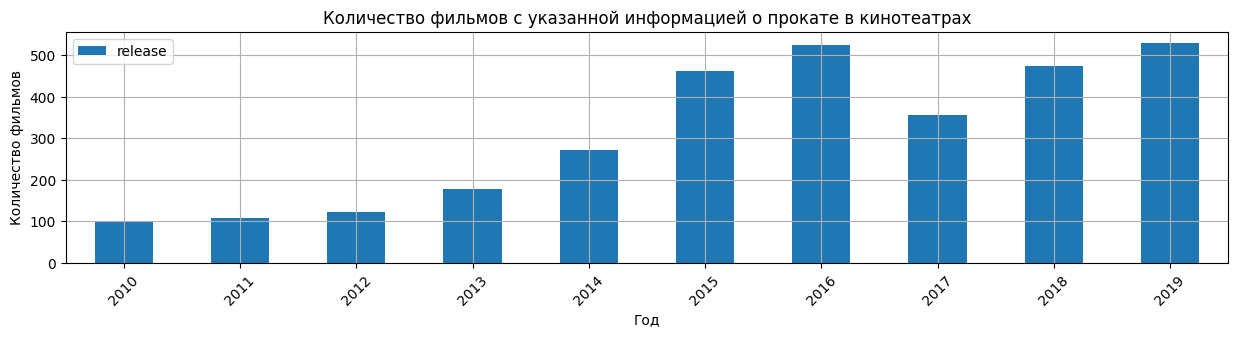

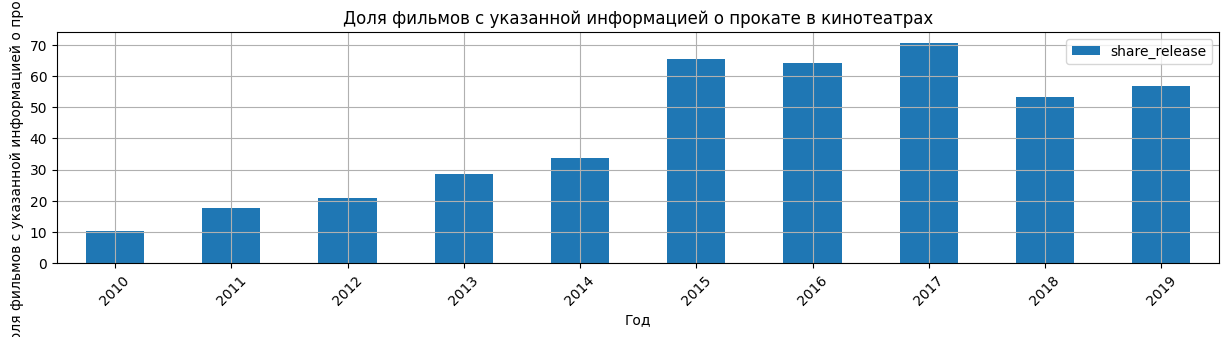

In [45]:
# Строим столбчатую диаграмму, показывающую количество фильмов с информацией о прокате в кинотеатрах
box.plot(title='Количество фильмов с указанной информацией о прокате в кинотеатрах',kind='bar',stacked=True,y=['release'],figsize=(15,3))
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Строим столбчатую диаграмму, показывающую долю фильмов с информацией о прокате в кинотеатрах
box.plot(title='Доля фильмов с указанной информацией о прокате в кинотеатрах',kind='bar',stacked=True,y=['share_release'],figsize=(15,3))
plt.xlabel('Год')
plt.ylabel('Доля фильмов с указанной информацией о прокате, %')
plt.grid()
plt.xticks(rotation=45)
plt.show()

На период с 2010-2019гг:
- минимальное количество фильмов в прокате было в 2010г (101), затем с каждым годом количество релизов увеличивалось вплоть до 2016 года (свыше 500)- резкий спад в 2017г (около 350) и в 2019 году показатели смогли немного превысить пик 2016 года.
- минимальная доля фильмов в прокате также была в 2010г (10%), затем линейно росла до 2014года включительно. Резкий скачок в 2015 году(65.5%), неюольшой спад в 2016г (64%) и затем в 2017 достиг максимального значения (70,7%). В 2018 и 2019 показатели снова немного опустились - 53,3% и 57% соответсвенно.

**Вывод:**

- В период с 2010-2014гг большая часть фильмов из реестра так и не выходили в прокат, хотя с годами показатели немного и поднимались (в прокате 10.2-33,8%). 
- С 2015-2017г ситуация резко улучшилась и свыше 64% фильмов, получившие прокатное удостоверение, смогли выйти в прокат. Лучшие показатели за все время - это 2017год: при относительно малом количестве фильмов в реестре 70.7% в прокате.
- В период за 2018 и 2019 год показатели несколько ухудщились: количество фильмов в реестре по численности примерно равно показателям 2015 и 2016 года, но вышли в прокат всего 53.3% и 57% фильмов соответственно - чуть больше половины. 

In [46]:
# Фильтруем данные, оставляя только те записи, где кассовые сборы больше 0
box_office = data.query('box_office > 0')

# Создаем сводную таблицу с суммой, медианой и средним значением кассовых сборов по годам
box_office_sum = pd.pivot_table(
    data=box_office,
    index='year',
    values='box_office',
    aggfunc={'sum','median','mean'}).copy()
box_office_sum

,mean,median,sum
year,,,
2010,2.404608e+04,1710.000,2.428654e+06
2011,1.293832e+05,3000.000,1.410276e+07
2012,5.654815e+04,6220.000,6.955423e+06
2013,1.664788e+05,3580.000,2.979971e+07
2014,2.727089e+07,20400.000,7.444952e+09
2015,8.549213e+07,5003450.150,3.949737e+10
2016,9.117390e+07,3915041.020,4.786630e+10
2017,1.360328e+08,9968340.000,4.856371e+10
2018,1.045651e+08,8891102.210,4.966840e+10


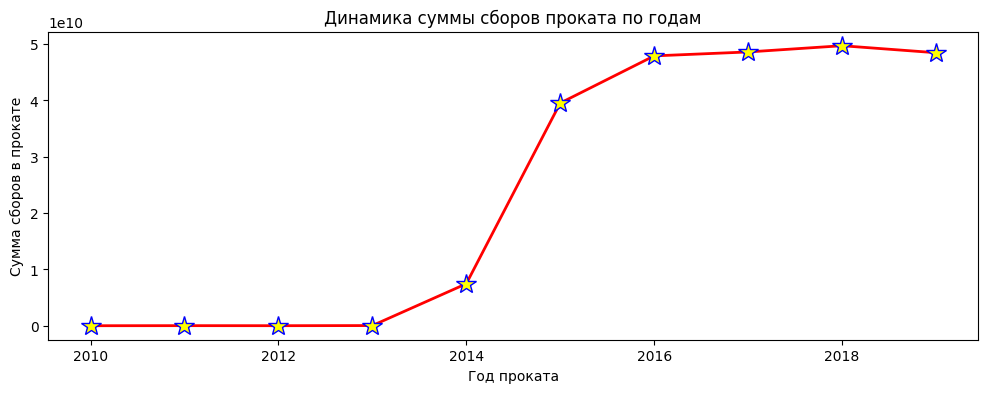

In [47]:
plt.figure(figsize=(12, 4))

# Строим график динамики суммы сборов в прокате по годам
plt.plot(box_office_sum.index, box_office_sum['sum'], color = 'red', linewidth = 2, marker='*', markersize=15, markerfacecolor='yellow', markeredgecolor='blue')
plt.xlabel('Год проката')
plt.ylabel('Сумма сборов в прокате')
plt.title('Динамика суммы сборов проката по годам');
plt.show()

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

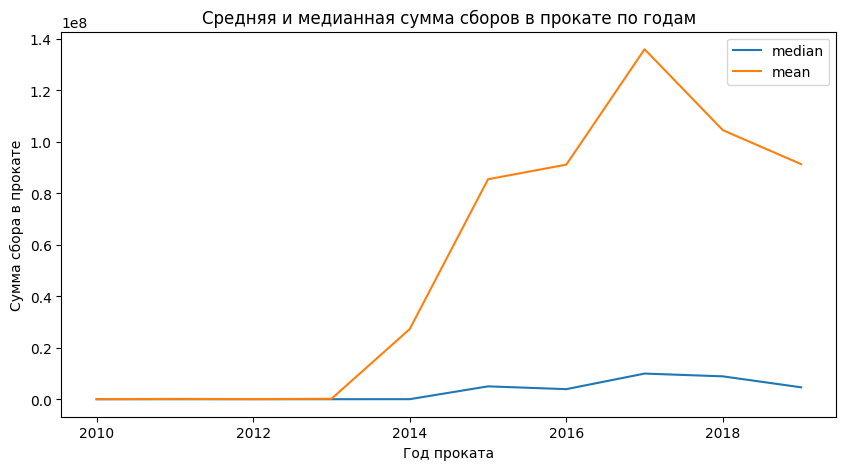

In [48]:
# Строим график средней и медианной суммы сборов в прокате по годам
box_office_sum.plot(title='Cредняя и медианная сумма сборов в прокате по годам', y=['median', 'mean'], figsize=(10,5))
plt.xlabel('Год проката')
plt.ylabel('Сумма сбора в прокате')
plt.show()

 - По данным графиков 'Динамика суммы сборов проката по годам' и 'Cредняя и медианная сумма сборов в прокате по годам' можно сказать, что общая сумма сборов была на стабильных показателях до 2013 года: затем начался резкий прирост. По разнице медианных и средних значений видно, что сумма сборов в разы увеличилась лишь для небольшого количества фильмов, в то время как большинство выходящих в прокат имели минимальный прирост. Пик сборов самых собираемых фильмов - это 2017 год, в 2020 году - сравнялись с данными 2015 года. Из-за большой разницы между медианными и средними значениями, можно сказать, что общая сумма сборов в прокате стабильна с 2016 года. 

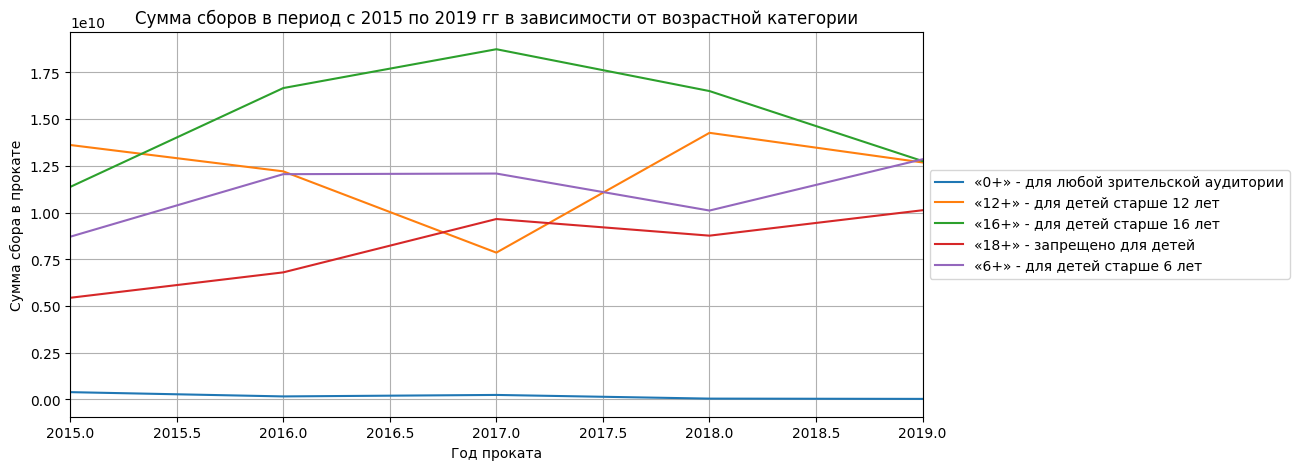

In [49]:
# Создаем сводную таблицу с суммой сборов по годам и возрастным ограничениям
box_office.pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum').plot(title='Сумма сборов в период с 2015 по 2019 гг в зависимости от возрастной категории', kind='line', xlim=[2015, 2019], figsize=(11,5),)
plt.xlabel('Год проката')
plt.ylabel('Сумма сбора в прокате')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

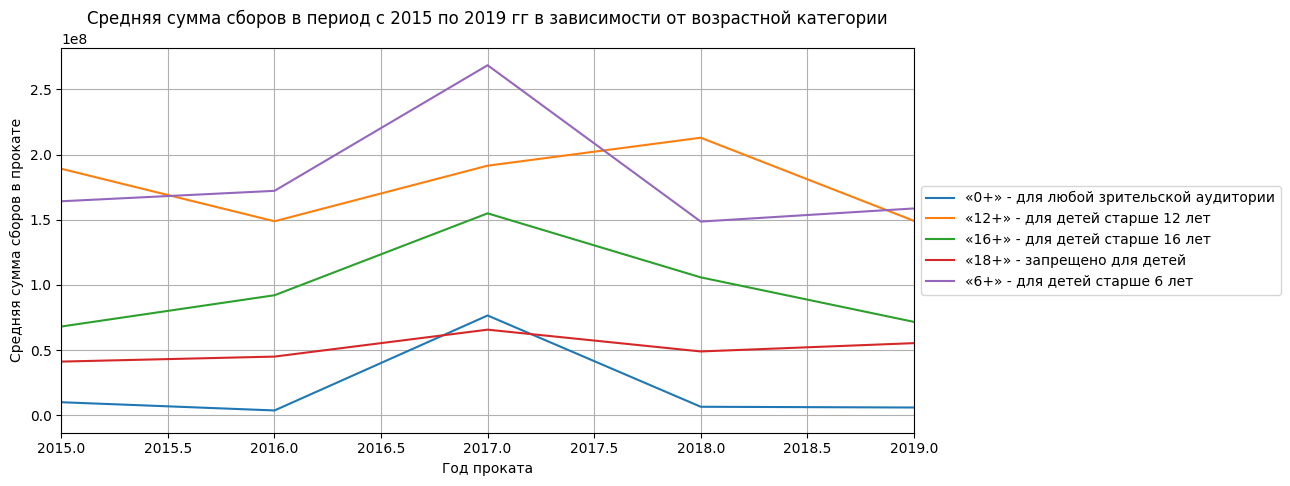

In [50]:
# Создаем сводную таблицу со средней суммой сборов по годам и возрастным ограничениям
box_office.pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='mean').plot(title='Cредняя сумма сборов в период с 2015 по 2019 гг в зависимости от возрастной категории', kind='line', xlim=[2015, 2019], figsize=(11,5),)
plt.xlabel('Год проката')
plt.ylabel('Средняя сумма сборов в прокате')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

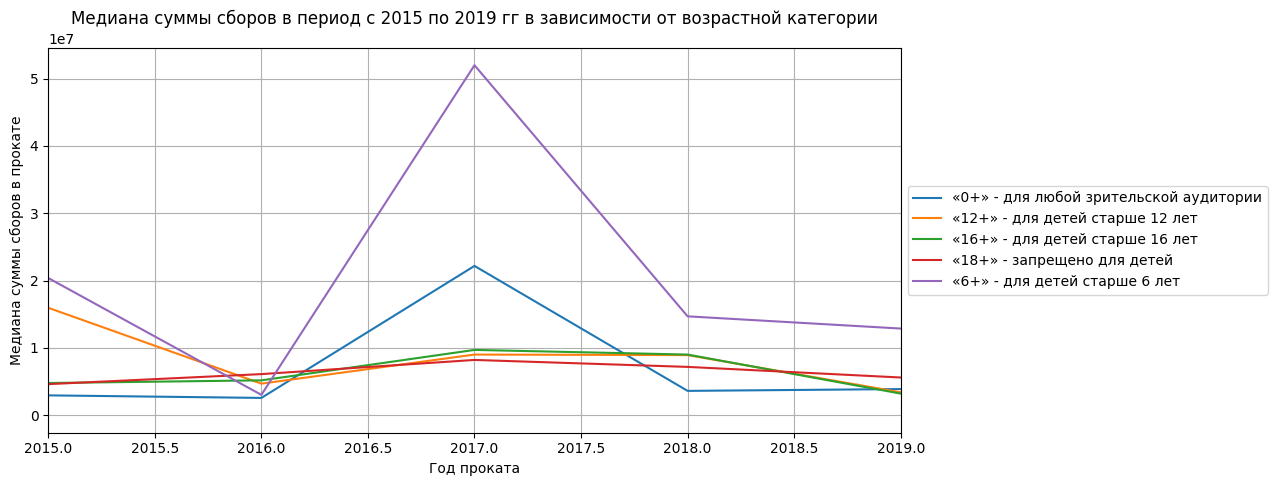

In [51]:
# Создаем сводную таблицу с медианой суммы сборов по годам и возрастным ограничениям
box_office.pivot_table(index='year',
                       columns='age_restriction',
                       values='box_office',
                       aggfunc='median').plot(title='Медиана суммы сборов в период с 2015 по 2019 гг в зависимости от возрастной категории', 
                                             kind='line', 
                                             xlim=[2015, 2019], 
                                             figsize=(11, 5))
plt.xlabel('Год проката')
plt.ylabel('Медиана суммы сборов в прокате')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### Вывод

 - Для категории "0+" в период за 2015-2019 гг сумма сборов стабильно приближенна к нулю. В 2017 году резкое увеличилось среднее и особенно медианное значение суммы сборов данной категории "0+", что говорит о том, что количество фильмов за этот период уменьшлось, но они дали значительный прирост суммы сборов, хоть и не повлияли на общегодовые показатели. Можно предположить. что в независимости от того, сколько в кинотеатрах фильмов данной категории - на них придет, в общей сумме, примерно одно и то же количество людей.
 - Для категории "6+" сумма сборов за период за 2015-2019 гг с малым увеличением колеблится на отметках примерно 8,75млрд- 12.5млрд. При этом, в 2016г сумма сборов увеличилась примерно на 3,7млрд, немного выросло среднее значение (в пределах 10млн) и резко упала медиана сборов: примерно на 17млн, что говорит о том, что на конечную сумму сборов повлияло как увеличение количества фильмов данной категории, так и повышение средней суммы сборов для некоторых фильмов. В 2017 г динамика схожа с категорией "0+" для того же года: количество фильмов за этот период уменьшлось, но они дали значительный прирост суммы сборов, хоть и не повлияли на общегодовые показатели. В 2018 г средняя сумма сборов уменьшилась и медианные показатели тоже, из чего можно предположить, что на понижение общей сумму сборов по большей части влияют именно средние показатели. 
 - Категория "16+" за 4 года собрала больше всего денег в прокате. 
 - В 2017 году был резкое увеличение сборов для категории "16+" и практически зеркальный спад для "12+" в 2016-2017гг, из-за чего сборы были ниже трех остальных основных категорий. Вероятно, это связано с большим количеством качественных популярных фильмов снятых в 2017г для категории "16+". Люди ходят на ограниченное количество фильмов, резкая популярность фильмов одной категории может сильно повлиять на сборы соседней. И, по итогу, общая сумма сборов в год в среднем не изменится.
 - к 2019 году сумма сборов сравнялись для категорий "6+", "12+" и "16+".
 - Фильмы с категорией "18+" имеет практически линейный рост - за 4 года на 50млн, с небольшим пиковым ростом в 2017 году. 

### Исследование фильмов, получивших государственную поддержку

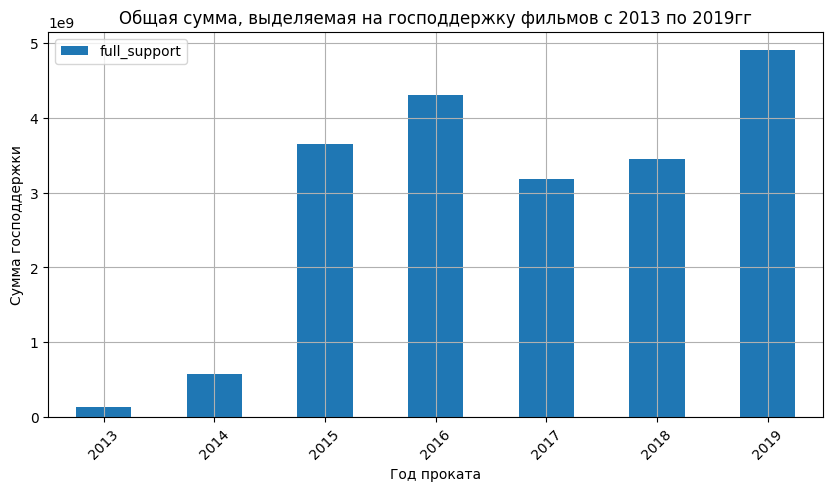

In [52]:
# Фильтруем данные, оставляя только записи с неотрицательной господдержкой
state_support = data.query('refundable_support >=0 & nonrefundable_support>=0').copy()

# Создаем новый столбец 'full_support', который является суммой возмездной и безвозмездной поддержки
state_support['full_support'] = data['refundable_support'] + data['nonrefundable_support']

# Группируем данные по годам и суммируем общую поддержку, затем строим столбчатую диаграмму
state_support[['full_support', 'year']].groupby('year').agg('sum') .plot(title='Общая сумма, выделяемая на господдержку фильмов с 2013 по 2019гг', kind='bar',figsize=(10,5))
plt.xlabel('Год проката')
plt.ylabel('Сумма господдержки')
plt.grid()
plt.xticks(rotation=45)
plt.show()

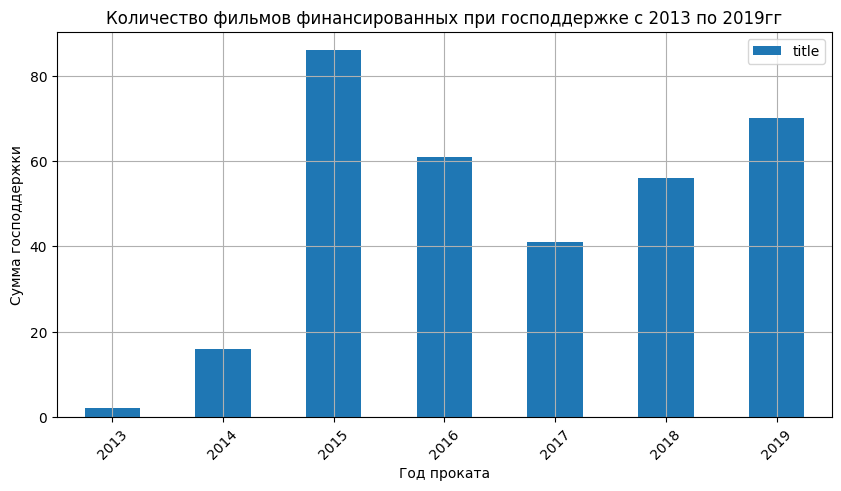

In [53]:
# Группируем данные по годам и считаем количество фильмов, финансируемых при господдержке, затем строим столбчатую диаграмму
state_support[['title', 'year']].groupby('year').agg('count') .plot(title='Количество фильмов финансированных при господдержке с 2013 по 2019гг', kind='bar',figsize=(10,5))
plt.xlabel('Год проката')
plt.ylabel('Сумма господдержки')
plt.grid()
plt.xticks(rotation=45)
plt.show()

- В период за 2015 и 2016гг наблюдается отрицательная корреляция между такими параметрами как количество профинансированных фильмов и суммарное количество сборов, но с 2017 года показатели улучшились и уже можно заметить стабильную корреляию между этими двумя параметрами, из-за чего можно предположить, что улучшилось качество выбора фильмов для финансирования. 

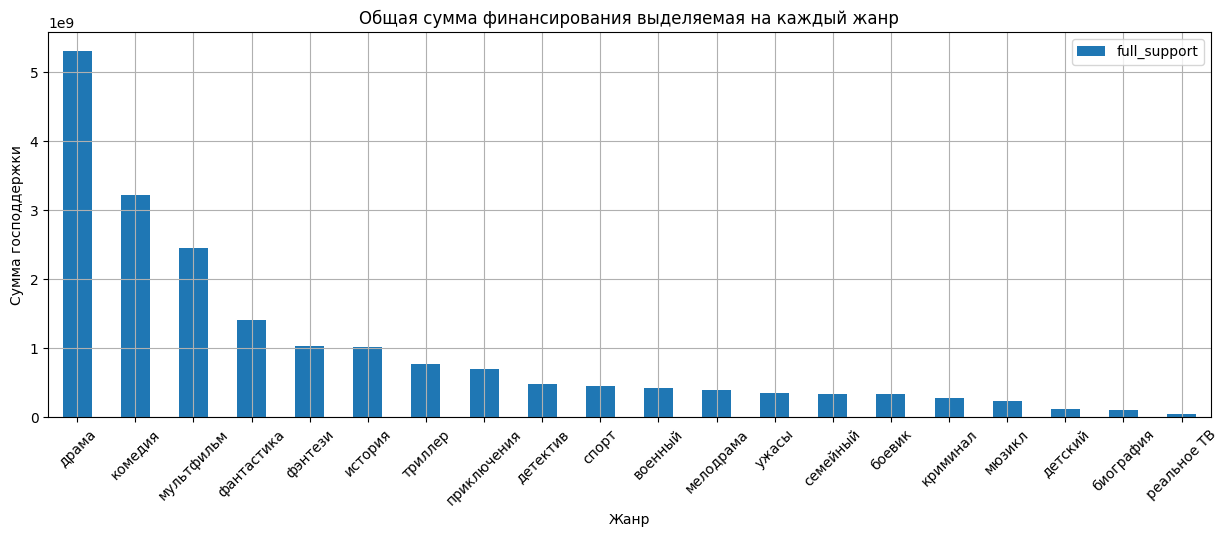

In [54]:
# Группируем данные по жанрам и суммируем общую поддержку, затем строим столбчатую диаграмму
state_support[['full_support', 'base_genres']].groupby('base_genres').agg('sum').sort_values(by='full_support', ascending=False) .plot(title='Общая сумма финансирования выделяемая на каждый жанр', kind='bar',figsize=(15,5))
plt.xlabel('Жанр')
plt.ylabel('Сумма господдержки')
plt.grid()
plt.xticks(rotation=45)
plt.show()

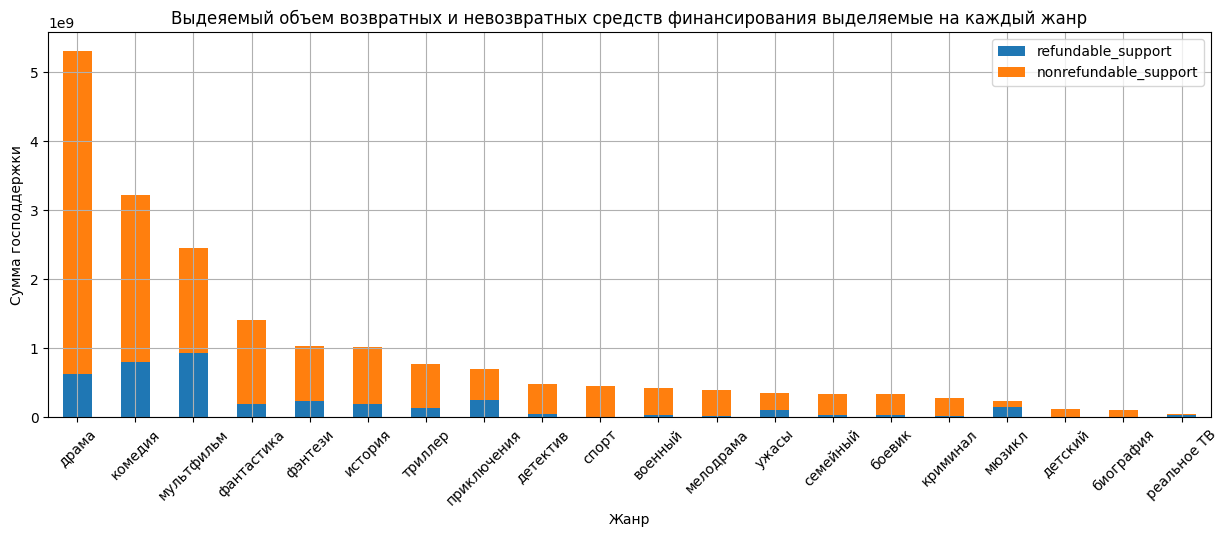

In [55]:
# Выбираем числовые столбцы из данных о господдержке
numeric_columns = state_support.select_dtypes(include='number').columns

# Группируем данные по жанрам и суммируем объем возвратных и невозвратных средств, затем строим столбчатую диаграмму
state_support.groupby('base_genres')[numeric_columns].agg('sum').sort_values(by='full_support',
                         ascending=False).plot(title='Выдеяемый объем возвратных и невозвратных средств финансирования выделяемые на каждый жанр', kind='bar', stacked=True, y=['refundable_support', 'nonrefundable_support'], figsize=(15, 5))
plt.xlabel('Жанр')
plt.ylabel('Сумма господдержки')
plt.grid()
plt.xticks(rotation=45)
plt.show()

- Большинство средств, выделяемых государством на поддержку фильмов по всем жанрам - является невозвратным;
- За исключением мюзиклом - на них финансирование, в основном, выделяется из объёма возвратных средств

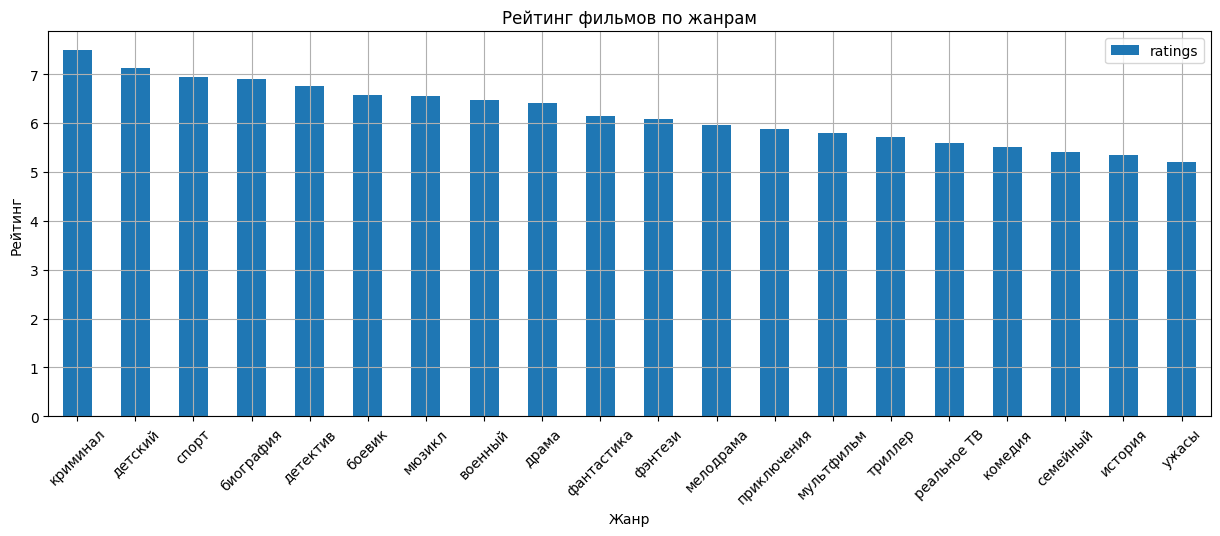

In [56]:
# Группируем данные по жанрам и рассчитываем средний рейтинг, затем строим столбчатую диаграмму
state_support[['base_genres', 'ratings']].groupby('base_genres').agg('mean').sort_values(by='ratings', ascending=False).plot(title='Рейтинг фильмов по жанрам', kind='bar',figsize=(15,5));
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [57]:
# Вычисляем коэффициент возврата инвестиций, вычитая 1 из отношения кассовых сборов к общей поддержке
state_support['recoupment'] = state_support['box_office'] / state_support['full_support'] - 1

# Определяем, были ли средства возвращены (возврат больше 0)
state_support['paid_off'] = state_support['recoupment'] > 0

# Определяем, не были ли средства возвращены (возврат меньше или равен 0)
state_support['not_paid_off'] = ~state_support['paid_off']

state_support = state_support.dropna()

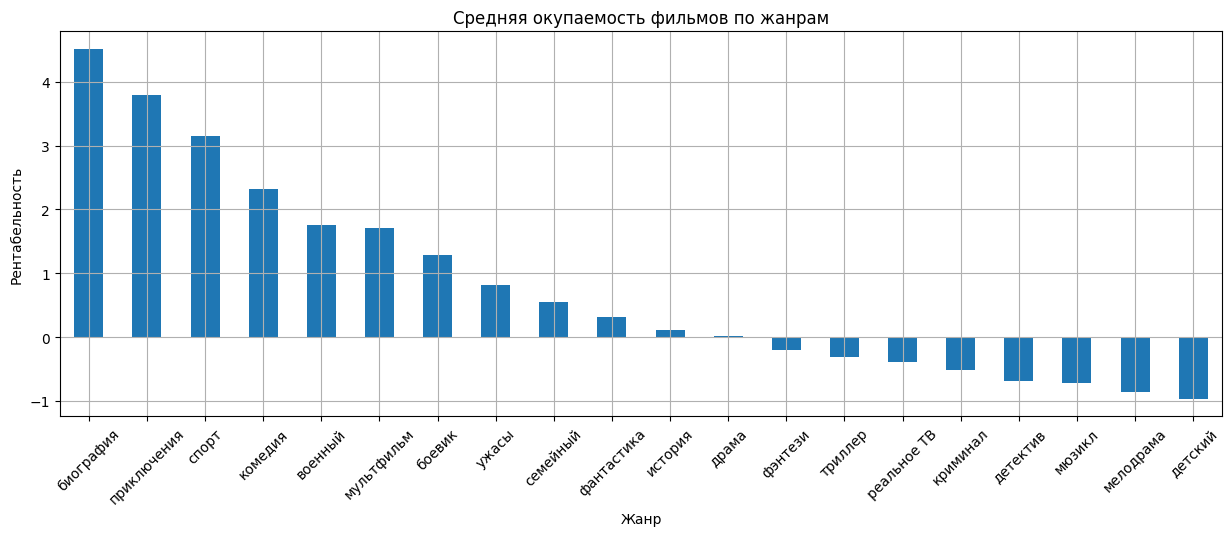

In [58]:
# Группируем по 'base_genres' и вычисляем среднее значение для 'recoupment'
mean_recoupment = state_support.groupby('base_genres')['recoupment'].mean().sort_values(ascending=False)

# Построение графика
mean_recoupment.plot(title='Cредняя окупаемость фильмов по жанрам', kind='bar', figsize=(15, 5))
plt.xlabel('Жанр')
plt.ylabel('Рентабельность')
plt.grid()
plt.xticks(rotation=45)
plt.show()

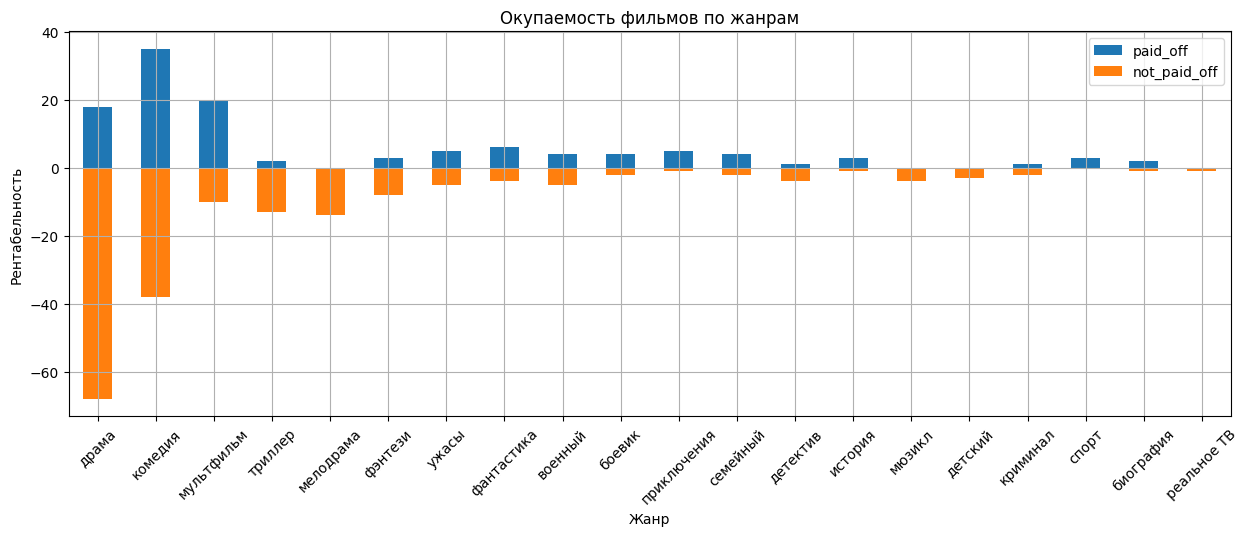

In [59]:
# Группируем данные по жанрам и вычисляем:
# - количество фильмов ('title')
# - общее количество возвращенных средств ('paid_off')
# - общее количество невозвращенных средств, инвертируя сумму ('not_paid_off')

state_support.groupby('base_genres').agg({'title': 'count','paid_off': 'sum','not_paid_off': lambda x: 0 - x.sum()}).sort_values(by='title',ascending=False).plot(title='Окупаемость фильмов по жанрам',kind='bar',figsize=(15,5),stacked=True,
                         y=['paid_off', 'not_paid_off'])
plt.xlabel('Жанр')
plt.ylabel('Рентабельность')
plt.grid()
plt.xticks(rotation=45)
plt.show()

 - Топ-5 жанров, на которые государство выдяет деньги это: драма, комедия, мультфильм, фантастика, фэнтези
 - Топ-5 самых рейтинговых жанров это: криминал, детский, спорт, биография, детектив
 - Топ 5 окупаемых фильмов это: биография, приключения, спорт, комедия, военный
 - Топ-5 не окупаемых фильмов это: драма, комедия, мелодрама, триллер, мультфильм
 
 
 - Такие жанры как: драма, комедия и мульфильмы - являются самыми финансированными, но при этом далеко не самые рейтинговые и окупаемые 
 - Жанры биография и спорт - лучшие для финансирования, так как имеют хорошие рейтинги и окупаемость

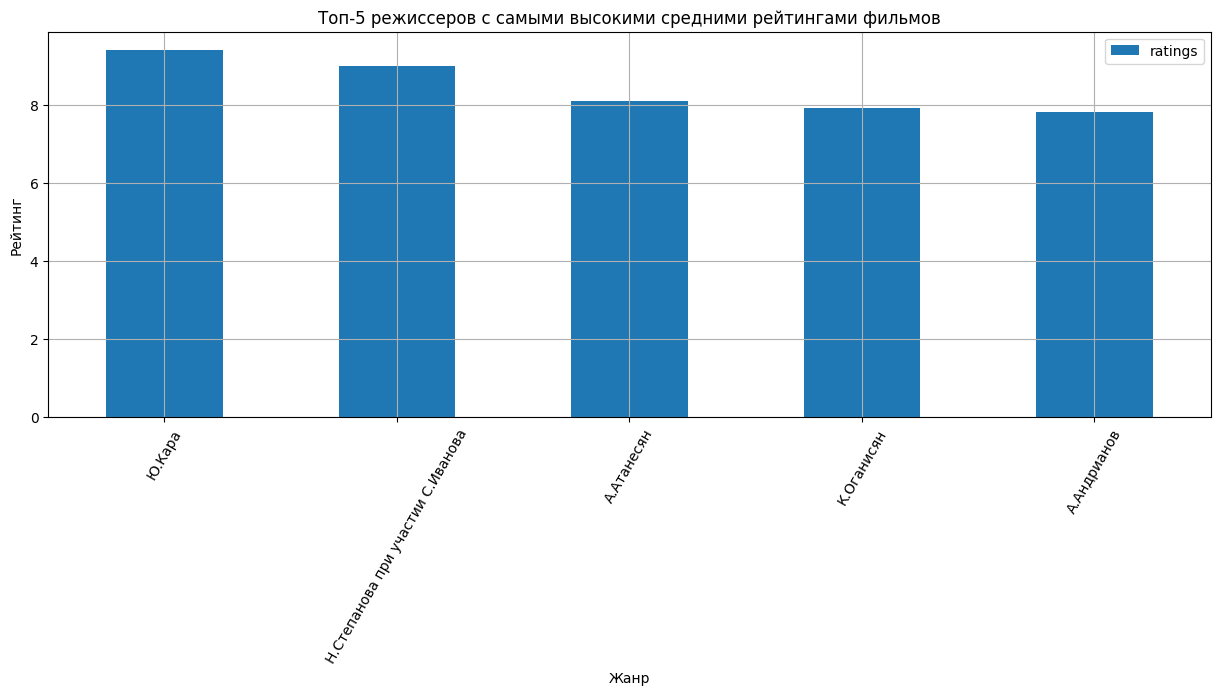

In [60]:
# Группируем данные по режиссерам и вычисляем средний рейтинг, 
# затем сортируем и выбираем топ-5 режиссеров с самыми высокими средними рейтингами
state_support[['base_director', 'ratings']].groupby('base_director').agg('mean').sort_values(by='ratings', ascending=False).head(5).plot(title='Топ-5 режиссеров с самыми высокими средними рейтингами фильмов', kind='bar',figsize=(15,5));
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.grid()
plt.xticks(rotation=60)
plt.show()

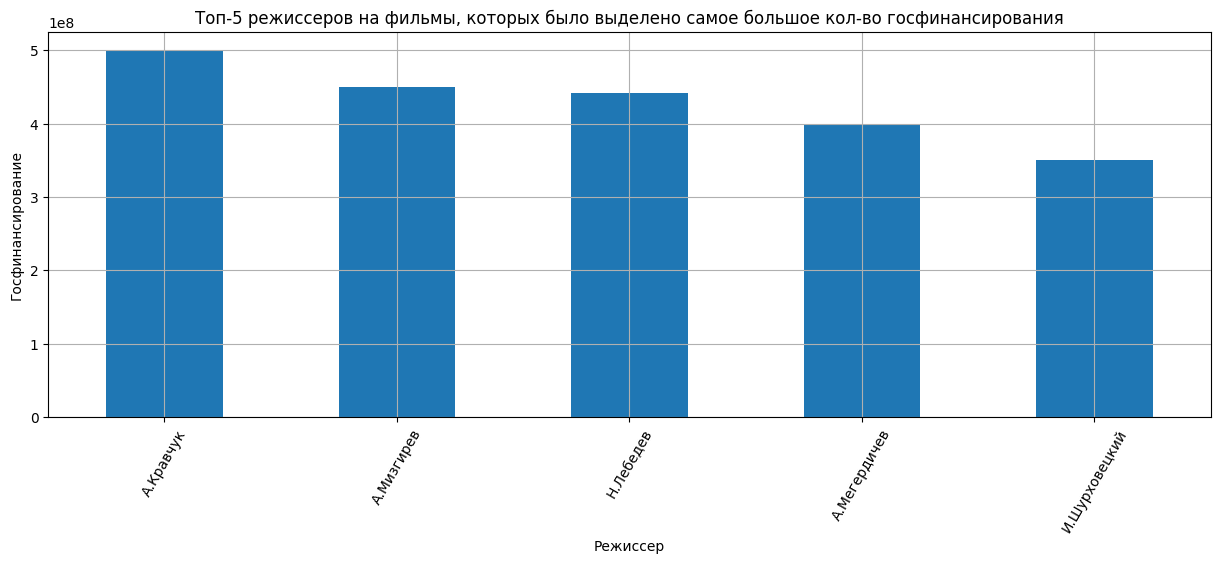

In [61]:
# Группируем данные по 'base_director' и вычисляем среднее значение для 'full_support'
top_directors = state_support.groupby('base_director')['full_support'].mean().sort_values(ascending=False).head(5)

# Построение графика
top_directors.plot(title='Топ-5 режиссеров на фильмы, которых было выделено самое большое кол-во госфинансирования', 
                   kind='bar', figsize=(15, 5), stacked=True)
plt.xlabel('Режиссер')
plt.ylabel('Госфинансирование')
plt.grid()
plt.xticks(rotation=60)
plt.show()

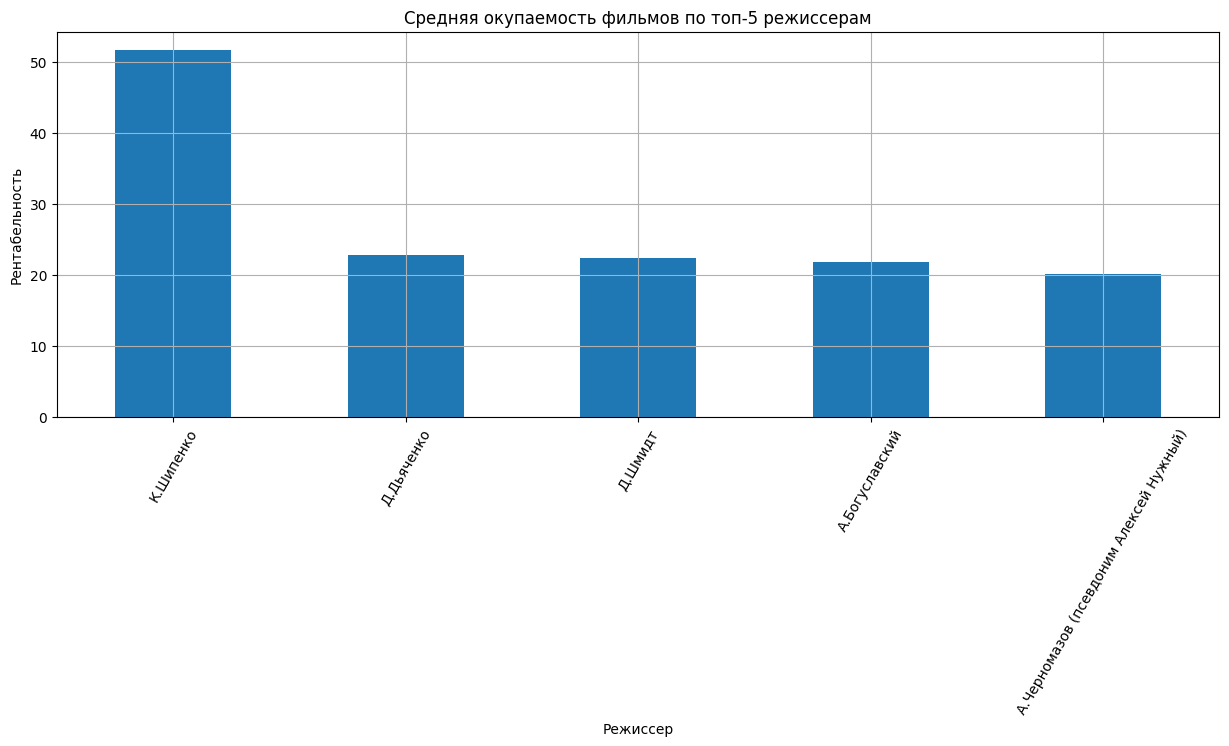

In [62]:
# Группируем данные по 'base_director' и вычисляем сумму для 'recoupment'
top_directors = state_support.groupby('base_director')['recoupment'].sum().sort_values(ascending=False).head(5)

# Построение графика
top_directors.plot(title='Cредняя окупаемость фильмов по топ-5 режиссерам', 
                   kind='bar', figsize=(15, 5))
plt.xlabel('Режиссер')
plt.ylabel('Рентабельность')
plt.grid()
plt.xticks(rotation=60)
plt.show()

- Топ-5 режиссеров с самым высоким средним рейтингом: Ю.Кара, Н.Степанова при участии С.Иванова, А.Атанесян, А.Попова, К.Оганисян

- Топ-5 режиссеров на фильмы, которых было выделено самое большое кол-во госфинансирования:
Ф.Бондарчук, А.Кравчук, А.Мизгирев, Н.Лебедев, А.Мегердичев

- Топ-5 самых окупаемых режиссеров: К.Шипенко, Д.Дьяченко, Д.Шмидт, А.Богуславский, А.Чермомазов (псевд. Алексей Нужный)

#### Вывод

- В период за 2015 и 2016гг наблюдается отрицательная корреляция между такими параметрами как количество профинансированных фильмов и суммарное количество сборов, но с 2017 года показатели улучшились и уже можно заметить стабильную корреляию между этими двумя параметрами, из-за чего можно предположить, что улучшилось качество выбора фильмов для финансирования. 
- Такие жанры как: драма, комедия и мульфильмы - являются самыми финансированными, но при этом далеко не самые рейтинговые или окупаемые 
- Жанры биография и спорт - лучшие для финансирования, так как имеют хорошие рейтинги и окупаемость
- 5 самых рейтинговых, окупаемых и профинансированных режиссеров - это 15 разных человек. 

### Общий вывод

1. - Большинство пропусков в данных не заполняемы: нет взаимосвязи между director, producer и film_studio. Столбец 'box_office' скорее всего заполнен лишь теми фильмами, для которых уже посчитаны сборы, другие, вероятно, так и не вышли в прокат. Данные 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source' заполнены лишь для фильмов с господдержкой.

- Основная ошибка категоиальных данных - это пробелы в начале или в конце строки. В столбце production_country я выявила очевидные опечатки при просмотре уникальных значений (например, "К;анада"), также избавилась от разделителей-дефисов, заменяющих в некоторых строках запятые. Есть и повторы-опечатки: столбец 'puNumber'. Повторы в столбце 'title' из-за разных запусков одних и тех же фильмов.

- Ошибка количественных значений - это строки, в которых обозначенно оказание господдержки, но общий бюджет равен нулю. Заменены  медианными значениями доли общей суммы поддержки от общего бюджета фильма.

- Добавлены столбцы с информацией о годе проката. Также столбцы с именем и фамилией главного режиссёра и с основным жанром фильма. В столбцы вошли первые имена из списка режиссёров и первые основные жанры.

2.  - Для категории "0+" сумма сборов стабильно приближенна к нулю.
 - Можно предположить. что в независимости от того, сколько в кинотеатрах фильмов категории "0+" - на них придет, в общей сумме, примерно одно и то же количество людей.
 - Можно предположить, что на понижение общей сумму сборов по большей части влияют именно средние показатели, а не медианные. 
 - Категория "16+" за 4 года собрала больше всего денег в прокате. 
 - Люди ходят на ограниченное количество фильмов, резкая популярность фильмов одной категории может сильно повлиять на сборы соседней. Общая сумма сборов в год в среднем не изменяется.
 - к 2019 году сумма сборов сравнялись для категорий "6+", "12+" и "16+".
 - Фильмы с категорией "18+" имеет практически линейный рост - за 4 года на 50млн, с небольшим пиковым ростом в 2017 году. 
 
 3. - В период за 2015 и 2016гг наблюдается отрицательная корреляция между такими параметрами как количество профинансированных фильмов и суммарное количество сборов, но с 2017 года показатели улучшились и уже заметна стабильная корреляцию между этими двумя параметрами, из-за чего можно предположить, что улучшилось качество выбора фильмов для финансирования. 
- Такие жанры как: драма, комедия и мульфильмы - являются самыми финансированными, но при этом далеко не самые рейтинговые или окупаемые 
- Жанры биография и спорт - лучшие для финансирования, так как имеют хорошие рейтинги и окупаемость
- 5 самых рейтинговых, окупаемых и профинансированных режиссеров - это 15 разных человек. 